# Action preferences dynamics

In [11]:
import sys
sys.path.append("../src")

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from Classes.bar import Bar

In [191]:
alternations = [
    # [1, 1, 0], [1, 1, 1], [1, 1, 1], [1, 1, 0]
    [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]
    # [1, 0, 1]
]

num_agents = len(alternations[0])

<Axes: >

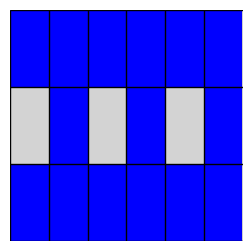

In [192]:
list_decisions = alternations[:6]

# Create bar object
bar = Bar(
	num_agents=num_agents,
	threshold=0.7
)

score_player1 = []
av_score_player1 = 0.0
n_go = 1
list_av_score_player1 = [av_score_player1]

conditional_av_score_player1 = 0.0
n_state = 1
list_conditional_av_score_player1 = [conditional_av_score_player1]

for r, decisions in enumerate(list_decisions):
	attendance, scores = bar.step(decisions)
	score_player1.append(scores[-1])
	if decisions[-1] == 1:
		n_go += 1
		av_score_player1 += (scores[-1] - av_score_player1) / n_go
		if r > 0 and list_decisions[r - 1] == [1, 0, 1]:
			n_state += 1
			conditional_av_score_player1 += (scores[-1] - conditional_av_score_player1) / n_state

	list_av_score_player1.append(av_score_player1)
	list_conditional_av_score_player1.append(conditional_av_score_player1)

# # Draw bar playout
bar.render(
	num_rounds=len(bar.history)
)

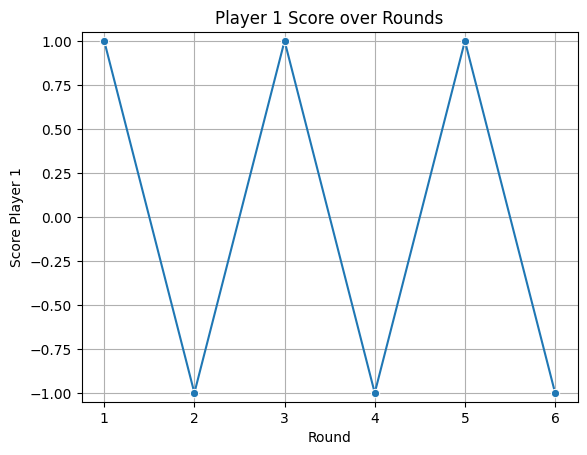

In [193]:
ax = sns.lineplot(
    score_player1,
    marker='o'
)
ax.grid()
ax.set_xticks(range(len(alternations)))
ax.set_xticklabels(range(1, 1 + len(alternations)))
ax.set_xlabel("Round")
ax.set_ylabel("Score Player 1")
ax.set_ylim([-1.05, 1.05])
ax.set_title("Player 1 Score over Rounds")
plt.show()

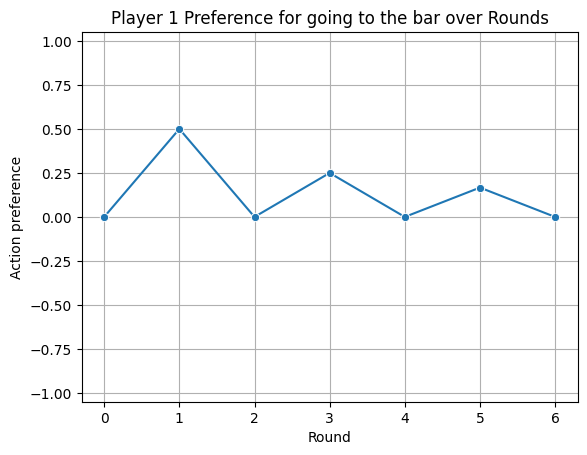

In [194]:
ax = sns.lineplot(
    list_av_score_player1,
    marker='o'
)
ax.grid()
ax.set_xticks(range(len(alternations) + 1))
ax.set_xticklabels(range(len(alternations) + 1))
ax.set_xlabel("Round")
ax.set_ylabel("Action preference")
ax.set_ylim([-1.05, 1.05])
ax.set_title("Player 1 Preference for going to the bar over Rounds")
plt.show()

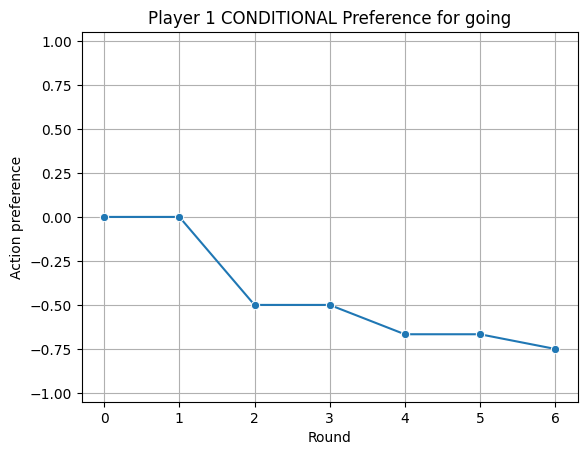

In [195]:
ax = sns.lineplot(
    list_conditional_av_score_player1,
    marker='o'
)
ax.grid()
ax.set_xticks(range(len(alternations) + 1))
ax.set_xticklabels(range(len(alternations) + 1))
ax.set_xlabel("Round")
ax.set_ylabel("Action preference")
ax.set_ylim([-1.05, 1.05])
ax.set_title("Player 1 CONDITIONAL Preference for going")
plt.show()